In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle as p
import warnings
warnings.filterwarnings('ignore')

In [114]:
HINDUNILVR = p.load(open("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/Final/HINDUNILVR_combined_v3.p",'rb'))

### Data Preprocessing

### Model

In [115]:
# # Seed value
# # Apparently you may use different seed values at each stage
# seed_value= 11

# # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(seed_value)

# # 2. Set the `python` built-in pseudo-random generator at a fixed value
# import random
# random.seed(seed_value)

# # 3. Set the `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
# import tensorflow as tf
# tf.random.set_seed(seed_value)
# # for later versions: 
# # tf.compat.v1.set_random_seed(seed_value)

# # 5. Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [116]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 3), activation = tf.nn.leaky_relu, return_sequences = True, \
                                                           kernel_initializer='random_normal',
                                                           bias_initializer='zeros'),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [117]:
model = Model()

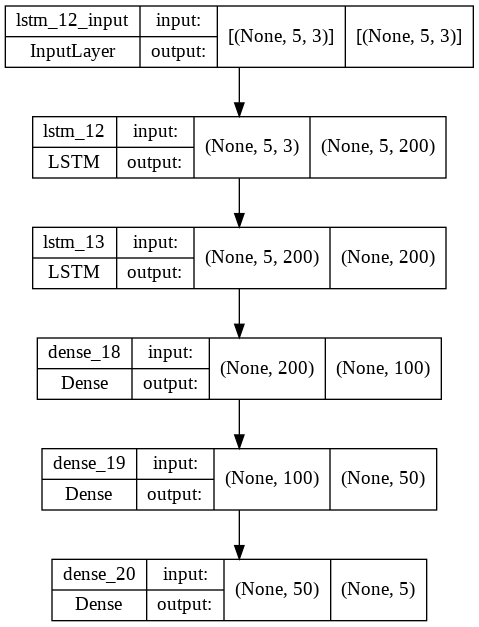

In [118]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [119]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 5, 200)            163200    
                                                                 
 lstm_13 (LSTM)              (None, 200)               320800    
                                                                 
 dense_18 (Dense)            (None, 100)               20100     
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 5)                 255       
                                                                 
Total params: 509,405
Trainable params: 509,405
Non-trainable params: 0
_________________________________________________________________


### Custom Learning Rate

In [120]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [121]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=30,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

#HINDUNILVR

In [122]:
HINDUNILVR.tail()

,stock_open,stock_high,stock_low,stock_close,stock_adjclose_target,Volume,SMA,EMA,nifty50_price,nifty50_open,nifty50_high,nifty50_low,nifty50_Vol.,nifty50_Chg%,niftybank_price,niftybank_open,niftybank_high,niftybank_low,niftybank_Vol.,niftybank_Change %,Sales,Expenses,Material Cost,Employee Cost,Operating Profit,OPM,Other Income,Interest,Depreciation,Profit before tax,Tax,Net Profit,EPS in Rs,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,CPI Index,CPI Index Previous Month,CPI Index Previous Quarter,CPI Index Previous Year,by_Closing_Price,by_Open,by_High,by_Low,by_Change%,Per_chg_qgdp,CPI_monthly_oecd,cli_monthly,ShPrice_monthly
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-24,2406.000000,2406.00,2367.000000,2374.750000,2374.750000,999070.0,2396.76,2398.7034,17415.05,17550.05,17600.60,17354.0,298050000.0,-0.50,37441.95,37384.75,37891.90,37238.05,157620000.0,0.45,13439.0,10030.0,47.72,5.15,3409.0,25.0,-7.0,27.0,272.0,3103.0,26.0,2297.0,9.78,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.367,6.390,6.390,6.363,0.05,12.6866,4.837365,100.217,217.3347
2021-11-25,2387.000000,2387.00,2341.000000,2349.050049,2349.050049,1363272.0,2391.62,2389.8210,17536.25,17417.30,17564.35,17351.7,255950000.0,0.70,37364.75,37362.05,37507.95,37118.40,140760000.0,-0.21,13439.0,10030.0,47.72,5.15,3409.0,25.0,-7.0,27.0,272.0,3103.0,26.0,2297.0,9.78,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.367,6.376,6.376,6.366,0.00,12.6866,4.837365,100.217,217.3347
2021-11-26,2344.000000,2365.00,2325.199951,2335.100098,2335.100098,2450902.0,2387.50,2379.8081,17026.45,17338.75,17355.40,16985.7,356330000.0,-2.91,36025.50,36830.90,36868.90,35904.10,211360000.0,-3.58,13439.0,10030.0,47.72,5.15,3409.0,25.0,-7.0,27.0,272.0,3103.0,26.0,2297.0,9.78,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.330,6.338,6.338,6.319,-0.58,12.6866,4.837365,100.217,217.3347
2021-11-29,2334.399902,2342.25,2284.699951,2329.399902,2329.399902,1724612.0,2379.71,2370.5884,17053.95,17055.80,17160.70,16782.4,348890000.0,0.16,35976.45,36224.45,36347.85,35327.90,187220000.0,-0.14,13439.0,10030.0,47.72,5.15,3409.0,25.0,-7.0,27.0,272.0,3103.0,26.0,2297.0,9.78,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.335,6.375,6.375,6.329,0.08,12.6866,4.837365,100.217,217.3347
2021-11-30,2322.000000,2361.00,2302.000000,2317.550049,2317.550049,3931035.0,2369.12,2361.1087,16983.20,17051.15,17324.65,16931.4,498000000.0,-0.41,35695.30,35958.80,36774.20,35526.35,227280000.0,-0.78,13439.0,10030.0,47.72,5.15,3409.0,25.0,-7.0,27.0,272.0,3103.0,26.0,2297.0,9.78,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.326,6.331,6.342,6.307,-0.14,12.6866,4.837365,100.217,217.3347


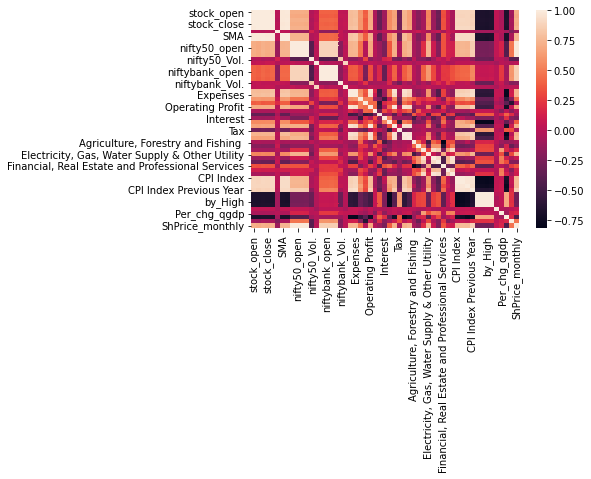

In [123]:
sns.heatmap(HINDUNILVR.corr())

In [124]:
HINDUNILVR.corr()

,stock_open,stock_high,stock_low,stock_close,stock_adjclose_target,Volume,SMA,EMA,nifty50_price,nifty50_open,nifty50_high,nifty50_low,nifty50_Vol.,nifty50_Chg%,niftybank_price,niftybank_open,niftybank_high,niftybank_low,niftybank_Vol.,niftybank_Change %,Sales,Expenses,Material Cost,Employee Cost,Operating Profit,OPM,Other Income,Interest,Depreciation,Profit before tax,Tax,Net Profit,EPS in Rs,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,CPI Index,CPI Index Previous Month,CPI Index Previous Quarter,CPI Index Previous Year,by_Closing_Price,by_Open,by_High,by_Low,by_Change%,Per_chg_qgdp,CPI_monthly_oecd,cli_monthly,ShPrice_monthly
stock_open,1.000000,0.995712,0.996900,0.993069,0.992648,-0.001209,0.983113,0.987069,0.706443,0.706485,0.710029,0.702498,-0.027658,0.040348,0.397225,0.397122,0.403084,0.389697,0.039844,0.032499,0.775300,0.791772,0.610141,0.377632,0.697955,-0.045801,-0.345348,-0.092252,0.558713,0.665527,-0.286043,0.740662,0.656149,-0.053238,-0.197071,-0.075794,0.543536,-0.115556,-0.324982,0.332931,0.109726,-0.063190,0.897150,0.898223,0.898555,0.879500,-0.679822,-0.679128,-0.684749,-0.673859,0.040602,-0.049552,-0.676905,-0.077416,0.715976
stock_high,0.995712,1.000000,0.994634,0.996962,0.995268,0.011587,0.979102,0.983733,0.687804,0.686505,0.691655,0.682482,-0.002741,0.058892,0.378302,0.377040,0.384606,0.369322,0.053828,0.042000,0.766548,0.782646,0.616792,0.397598,0.690585,-0.041440,-0.348316,-0.087437,0.559328,0.656372,-0.298998,0.735803,0.648363,-0.041895,-0.188295,-0.073019,0.531597,-0.108920,-0.313791,0.322222,0.116706,-0.055089,0.890021,0.891843,0.893479,0.869664,-0.682851,-0.681937,-0.686954,-0.677523,0.039921,-0.050017,-0.680816,-0.102710,0.698830
stock_low,0.996900,0.994634,1.000000,0.996668,0.996485,-0.010231,0.981877,0.986269,0.720915,0.719885,0.723502,0.717194,-0.046072,0.054597,0.413458,0.412321,0.418117,0.406341,0.028574,0.041710,0.778407,0.795559,0.605166,0.356945,0.699078,-0.050226,-0.339722,-0.094689,0.559322,0.667965,-0.275155,0.739565,0.657697,-0.057591,-0.202767,-0.078066,0.550963,-0.119632,-0.333990,0.339879,0.099236,-0.069185,0.900610,0.901947,0.900238,0.884702,-0.676189,-0.675634,-0.681603,-0.669670,0.038018,-0.053844,-0.670023,-0.048452,0.729062
stock_close,0.993069,0.996962,0.996668,1.000000,0.998943,0.006625,0.978453,0.983458,0.705838,0.703406,0.708402,0.700573,-0.024726,0.078800,0.397586,0.395219,0.402394,0.388871,0.039606,0.055990,0.772960,0.789761,0.610221,0.374316,0.694814,-0.045722,-0.343059,-0.090002,0.562472,0.661996,-0.288726,0.738012,0.653707,-0.052070,-0.197204,-0.075451,0.542633,-0.114713,-0.324748,0.333251,0.105386,-0.062965,0.896500,0.898580,0.897628,0.878300,-0.681966,-0.681272,-0.686596,-0.675959,0.035943,-0.050453,-0.675313,-0.069219,0.715451
stock_adjclose_target,0.992648,0.995268,0.996485,0.998943,1.000000,0.003344,0.982294,0.987318,0.727259,0.724996,0.729919,0.722043,-0.039324,0.074480,0.415950,0.413737,0.420873,0.407231,0.030305,0.052950,0.794404,0.811262,0.613611,0.367976,0.715205,-0.043353,-0.347066,-0.089504,0.571030,0.683366,-0.286683,0.757826,0.675519,-0.059722,-0.207487,-0.074697,0.563996,-0.118026,-0.335966,0.344983,0.098370,-0.067714,0.912205,0.914780,0.912803,0.898110,-0.686907,-0.686331,-0.691766,-0.680735,0.039035,-0.039383,-0.686084,-0.046286,0.737709
Volume,-0.001209,0.011587,-0.010231,0.006625,0.003344,1.000000,0.023298,0.019913,-0.118401,-0.117369,-0.116365,-0.118780,0.129819,-0.020413,-0.167164,-0.165594,-0.164663,-0.167514,0.051933,-0.030061,-0.008981,-0.012967,0.074467,0.187108,0.002255,0.035995,-0.051159,0.037008,0.022804,-0.011365,-0.095007,0.018056,-0.015269,0.034940,0.089950,0.013958,-0.066352,0.030552,0.069065,-0.068857,0.072261,0.040175,0.006414,0.012786,0

In [125]:
HINDUNILVR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2019-01-01 to 2021-11-30
Data columns (total 55 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   stock_open                                                                    719 non-null    float64
 1   stock_high                                                                    719 non-null    float64
 2   stock_low                                                                     719 non-null    float64
 3   stock_close                                                                   719 non-null    float64
 4   stock_adjclose_target                                                         719 non-null    float64
 5   Volume                                                                        719 non-null    float64
 6   SMA            

In [126]:
# Resetting index to get date as an attribute
HINDUNILVR.reset_index(inplace=True)

In [127]:
# Defining training columns
trainCols = HINDUNILVR.columns.tolist()
trainCols.remove('stock_adjclose_target')
trainCols.remove('Date')

In [128]:
# trainCols = ['stock_adjclose_target'
      #        ,'CPI Index Previous Month',
      #  'CPI Index Previous Quarter', 'CPI Index', 'CPI Index Previous Year',
      #  'Expenses', 'Sales', 'Net Profit', 'ShPrice_monthly', 'nifty50_price', 'Operating Profit',
      #  'by_Closing_Price', 'CPI_monthly_oecd',
      #  'Profit before tax', 'EPS in Rs', 'Material Cost', 'Depreciation',
      #  'Electricity, Gas, Water Supply & Other Utility', 'niftybank_high',
      #  'niftybank_price', 'niftybank_open', 'niftybank_low', 'Employee Cost',
      #  'Trade, Hotels, Transport, Communication and Services Related to Broadcasting',
      #  'Financial, Real Estate and Professional Services', 'Other Income',
      #  'Tax', 'Mining & Quarrying'
      #  ]

In [129]:
trainCols = ['stock_adjclose_target','EMA', 'CPI Index Previous Month',
      #  'Expenses', 'ShPrice_monthly', 'nifty50_price', 'Operating Profit',
      #  'by_Closing_Price', 'CPI_monthly_oecd',
      #  'Profit before tax', 'EPS in Rs', 'Material Cost', 'Depreciation',
      #  'Electricity, Gas, Water Supply & Other Utility', 'niftybank_high',
      #  'niftybank_price', 'niftybank_open', 'niftybank_low', 'Employee Cost',
      #  'Trade, Hotels, Transport, Communication and Services Related to Broadcasting',
      #  'Financial, Real Estate and Professional Services', 'Other Income',
      #  'Tax', 'Mining & Quarrying'
       ]

In [130]:
len(trainCols)

3

In [131]:
# Change Dtype of date column
HINDUNILVR["Date"] = pd.to_datetime(HINDUNILVR["Date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [132]:
def Dataset(Data, train_cols, target_col, datecol,date):
  Train_Data = HINDUNILVR[HINDUNILVR[datecol] < pd.to_datetime(date)]
  # print(Train_Data.shape)
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, Train_Data.shape[0], 5):
    # print(i)
    Data_Train_X.append(Train_Data.loc[i : i + 4,trainCols].to_numpy())
    Data_Train_Y.append(Train_Data.loc[i : i + 4,target_col].to_numpy())

  if len(Data_Train_X[-1]) < 5:
    Data_Train_X.pop(-1)
    Data_Train_Y.pop(-1)

  Data_Train_X = Data_Train_X[:-1]
  Data_Train_Y = Data_Train_Y[1:]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_Y = np.array(Data_Train_Y)
  # Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))

  Test_Data = HINDUNILVR[HINDUNILVR[datecol] >= pd.to_datetime(date)]
  Test_Data.reset_index(inplace=True)
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, Test_Data.shape[0], 5):
    # print(i)
    Data_Test_X.append(Test_Data.loc[i : i + 4,trainCols].to_numpy())
    Data_Test_Y.append(Test_Data.loc[i : i + 4,target_col].to_numpy())

  print(len(Data_Test_X[-1]))

  if len(Data_Test_X[-1]) < 5:
    Data_Test_X.pop(-1)
    Data_Test_Y.pop(-1)

  Data_Test_X = Data_Test_X[:-1]
  Data_Test_Y = Data_Test_Y[1:]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_Y = np.array(Data_Test_Y)
  # Data_Test_X = Data_Test_X.reshape((-1, 5, 54))
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [133]:
HINDUNILVR.columns

Index(['Date', 'stock_open', 'stock_high', 'stock_low', 'stock_close',
       'stock_adjclose_target', 'Volume', 'SMA', 'EMA', 'nifty50_price',
       'nifty50_open', 'nifty50_high', 'nifty50_low', 'nifty50_Vol.',
       'nifty50_Chg%', 'niftybank_price', 'niftybank_open', 'niftybank_high',
       'niftybank_low', 'niftybank_Vol.', 'niftybank_Change %', 'Sales',
       'Expenses', 'Material Cost', 'Employee Cost', 'Operating Profit', 'OPM',
       'Other Income', 'Interest', 'Depreciation', 'Profit before tax', 'Tax',
       'Net Profit', 'EPS in Rs', 'Agriculture, Forestry and Fishing ',
       'Mining & Quarrying', 'Manufacturing',
       'Electricity, Gas, Water Supply & Other Utility', 'Construction',
       'Trade, Hotels, Transport, Communication and Services Related to Broadcasting',
       'Financial, Real Estate and Professional Services',
       'Public Administration, Defence and Other Services',
       'Total Gross Value Added at Basic Price', 'CPI Index',
       'CPI Index

In [134]:
HINDUNILVR_date = '2021-08-01'
HINDUNILVR_Train_X, HINDUNILVR_Train_Y, HINDUNILVR_Test_X, HINDUNILVR_Test_Y = Dataset(HINDUNILVR, trainCols, 'stock_adjclose_target', 'Date', HINDUNILVR_date)

2


In [135]:
print(HINDUNILVR[HINDUNILVR['Date'] < pd.to_datetime(HINDUNILVR_date)].shape)
print(HINDUNILVR[HINDUNILVR['Date'] >= pd.to_datetime(HINDUNILVR_date)].shape)

(637, 56)
(82, 56)


In [136]:
HINDUNILVR_Train_X.shape, HINDUNILVR_Train_Y.shape, HINDUNILVR_Test_X.shape, HINDUNILVR_Test_Y.shape

((126, 5, 3), (126, 5, 1), (15, 5, 3), (15, 5, 1))

In [137]:
HINDUNILVR.head(20)

,Date,stock_open,stock_high,stock_low,stock_close,stock_adjclose_target,Volume,SMA,EMA,nifty50_price,nifty50_open,nifty50_high,nifty50_low,nifty50_Vol.,nifty50_Chg%,niftybank_price,niftybank_open,niftybank_high,niftybank_low,niftybank_Vol.,niftybank_Change %,Sales,Expenses,Material Cost,Employee Cost,Operating Profit,OPM,Other Income,Interest,Depreciation,Profit before tax,Tax,Net Profit,EPS in Rs,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,CPI Index,CPI Index Previous Month,CPI Index Previous Quarter,CPI Index Previous Year,by_Closing_Price,by_Open,by_High,by_Low,by_Change%,Per_chg_qgdp,CPI_monthly_oecd,cli_monthly,ShPrice_monthly
0,2019-01-01,1824.800049,1824.800049,1798.349976,1801.099976,1724.875488,807345.0,1738.1701,1735.8919,10910.10,10881.70,10923.60,10807.10,159400000.0,0.44,27392.40,27231.40,27430.55,27019.05,116380000.0,0.85,10201.0,7807.0,47.54,4.23,2394.0,23.0,49.0,7.0,144.0,2292.0,31.0,1571.0,7.26,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.418,7.401,7.447,7.385,0.65,1.56202,6.597222,101.1468,131.7876
1,2019-01-02,1792.400024,1808.849976,1771.300049,1784.599976,1709.073975,1598707.0,1732.7018,1730.9118,10792.50,10868.85,10895.35,10735.05,309670000.0,-1.08,27174.70,27297.00,27397.55,27077.60,176600000.0,-0.79,10201.0,7807.0,47.54,4.23,2394.0,23.0,49.0,7.0,144.0,2292.0,31.0,1571.0,7.26,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.354,7.409,7.415,7.350,-0.86,1.56202,6.597222,101.1468,131.7876
2,2019-01-03,1782.599976,1803.449951,1782.599976,1788.400024,1712.713379,1182624.0,1727.2765,1727.4205,10672.25,10796.80,10814.05,10661.25,286240000.0,-1.11,26959.85,27181.60,27206.20,26923.75,151200000.0,-0.79,10201.0,7807.0,47.54,4.23,2394.0,23.0,49.0,7.0,144.0,2292.0,31.0,1571.0,7.26,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.427,7.397,7.433,7.381,0.99,1.56202,6.597222,101.1468,131.7876
3,2019-01-04,1798.900024,1802.000000,1772.150024,1781.699951,1706.296753,1454134.0,1722.1386,1723.3276,10727.35,10699.70,10741.05,10628.65,296600000.0,0.52,27195.00,26999.70,27274.50,26926.10,189450000.0,0.87,10201.0,7807.0,47.54,4.23,2394.0,23.0,49.0,7.0,144.0,2292.0,31.0,1571.0,7.26,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.448,7.407,7.475,7.406,0.28,1.56202,6.597222,101.1468,131.7876
4,2019-01-07,1791.500000,1804.000000,1782.449951,1784.949951,1709.409058,909032.0,1720.3285,1720.7538,10771.80,10804.85,10835.95,10750.15,269370000.0,0.41,27304.55,27378.65,27477.80,27279.55,161030000.0,0.40,10201.0,7807.0,47.54,4.23,2394.0,23.0,49.0,7.0,144.0,2292.0,31.0,1571.0,7.26,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.508,7.467,7.519,7.439,0.81,1.56202,6.597222,101.1468,131.7876
5,2019-01-08,1792.000000,1793.500000,1761.099976,1770.849976,1695.905884,1262707.0,1719.0884,1716.1928,10802.15,10786.25,10818.45,10733.25,277700000.0,0.28,27509.50,27301.90,27542.40,27161.95,150550000.0,0.75,10201.0,7807.0,47.54,4.23,2394.0,23.0,49.0,7.0,144.0,2292.0,31.0,1571.0,7.26,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.454,7.503,7.534,7.439,-0.72,1.56202,6.597222,101.1468,131.7876
6,2019-01-09,1777.500000,1797.000000,1773.400024,1785.000000,1709.457153,1324628.0,1718.3270,1714.6550,10855.15,10862.40,10870.40,10749.40,333010000.0,0.49,

In [138]:
HINDUNILVR_Train_X[0], HINDUNILVR_Train_Y[0], HINDUNILVR_Test_X[0], HINDUNILVR_Test_Y[0]

(array([[1724.875488, 1735.8919  ,  140.2     ],
        [1709.073975, 1730.9118  ,  140.2     ],
        [1712.713379, 1727.4205  ,  140.2     ],
        [1706.296753, 1723.3276  ,  140.2     ],
        [1709.409058, 1720.7538  ,  140.2     ]]), array([[1695.905884],
        [1709.457153],
        [1710.606201],
        [1694.517334],
        [1689.25    ]]), array([[2318.551514, 2346.9377  ,  162.5     ],
        [2372.271484, 2351.616   ,  162.5     ],
        [2362.581055, 2353.5824  ,  162.5     ],
        [2343.299316, 2351.9114  ,  162.5     ],
        [2357.015137, 2352.7669  ,  162.5     ]]), array([[2369.935791],
        [2367.252441],
        [2375.849365],
        [2377.688232],
        [2389.813721]]))

### Model Fitting

In [139]:
HINDUNILVR_Model = Model()

In [140]:
HINDUNILVR_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [141]:
HINDUNILVR_hist = HINDUNILVR_Model.fit(HINDUNILVR_Train_X, HINDUNILVR_Train_Y, epochs = 1000, validation_data = (HINDUNILVR_Test_X, HINDUNILVR_Test_Y), callbacks=[callback])

Epoch 1/1000
4/4 [==============================] - 3s 173ms/step - loss: 2822977.5000 - root_mean_squared_error: 1680.1720 - val_loss: 896610.6875 - val_root_mean_squared_error: 946.8952
Epoch 2/1000
4/4 [==============================] - 0s 38ms/step - loss: 556788.6250 - root_mean_squared_error: 746.1827 - val_loss: 1133757.2500 - val_root_mean_squared_error: 1064.7804
Epoch 3/1000
4/4 [==============================] - 0s 36ms/step - loss: 394605.5000 - root_mean_squared_error: 628.1763 - val_loss: 21605.8496 - val_root_mean_squared_error: 146.9893
Epoch 4/1000
4/4 [==============================] - 0s 39ms/step - loss: 84660.0078 - root_mean_squared_error: 290.9639 - val_loss: 234594.0000 - val_root_mean_squared_error: 484.3490
Epoch 5/1000
4/4 [==============================] - 0s 38ms/step - loss: 89541.0938 - root_mean_squared_error: 299.2342 - val_loss: 19188.4199 - val_root_mean_squared_error: 138.5223
Epoch 6/1000
4/4 [==============================] - 0s 37ms/step - loss: 7

In [142]:
history_dict = HINDUNILVR_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

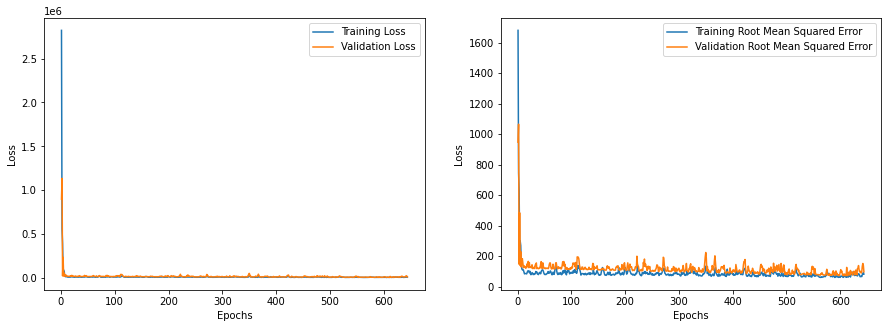

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of HINDUNILVR

In [144]:
HINDUNILVR_prediction = HINDUNILVR_Model.predict(HINDUNILVR_Test_X)

In [145]:
HINDUNILVR_prediction

array([[2367.0676, 2369.1975, 2363.778 , 2370.4143, 2380.9287],
       [2394.5923, 2396.7922, 2391.4927, 2397.8225, 2408.8982],
       [2554.6135, 2556.0303, 2550.627 , 2561.9631, 2571.0571],
       [2655.6455, 2657.5764, 2651.8599, 2660.6736, 2671.8542],
       [2747.486 , 2749.4856, 2743.416 , 2752.5132, 2764.0212],
       [2761.4531, 2763.8699, 2757.616 , 2764.9998, 2777.61  ],
       [2767.028 , 2769.3542, 2763.554 , 2770.602 , 2783.707 ],
       [2721.8   , 2724.3708, 2718.512 , 2723.4155, 2737.268 ],
       [2683.2788, 2685.6414, 2679.7456, 2686.0254, 2698.7856],
       [2651.258 , 2653.6892, 2648.1086, 2653.3022, 2666.648 ],
       [2554.0269, 2557.1833, 2550.9526, 2554.0647, 2567.8948],
       [2434.5938, 2437.396 , 2431.6118, 2435.9426, 2448.369 ],
       [2421.0586, 2423.507 , 2417.9453, 2423.7112, 2435.2832],
       [2416.4783, 2419.0652, 2413.4119, 2418.556 , 2430.4124],
       [2416.423 , 2418.7485, 2413.33  , 2418.9844, 2430.499 ]],
      dtype=float32)

In [146]:
HINDUNILVR[HINDUNILVR['Date'] >= '2021-08-01']['stock_adjclose_target'].values

array([2318.551514, 2372.271484, 2362.581055, 2343.299316, 2357.015137,
       2369.935791, 2367.252441, 2375.849365, 2377.688232, 2389.813721,
       2411.579834, 2468.629395, 2470.865479, 2603.400879, 2618.060791,
       2616.917969, 2628.844727, 2650.11377 , 2661.593506, 2671.283936,
       2707.46167 , 2716.207764, 2783.94165 , 2749.80127 , 2763.616455,
       2760.734131, 2783.79248 , 2793.48291 , 2769.331543, 2745.676758,
       2758.497803, 2751.341797, 2705.622803, 2783.24585 , 2795.271973,
       2767.492676, 2765.306152, 2729.873779, 2692.950684, 2707.213135,
       2668.898682, 2685.297852, 2687.53418 , 2669.792969, 2692.105713,
       2669.644043, 2653.095459, 2623.925049, 2628.944092, 2659.804443,
       2630.583984, 2633.366943, 2637.789795, 2531.244629, 2463.510742,
       2430.811768, 2439.11084 , 2440.850098, 2436.850098, 2396.600098,
       2389.649902, 2393.149902, 2407.100098, 2418.899902, 2411.350098,
       2422.850098, 2431.899902, 2431.149902, 2400.149902, 2376.

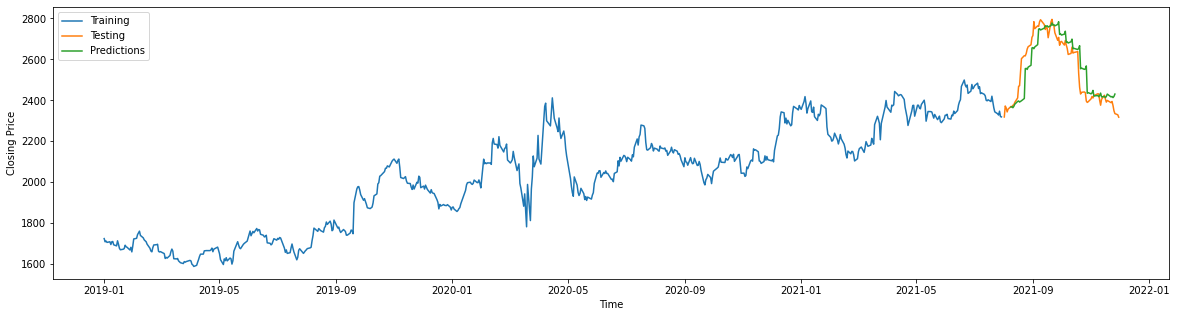

In [147]:
plt.figure(figsize=(20, 5))
plt.plot(HINDUNILVR['Date'][HINDUNILVR['Date'] < '2021-08-01'], HINDUNILVR['stock_adjclose_target'][HINDUNILVR['Date'] < '2021-08-01'], label = 'Training')
plt.plot(HINDUNILVR['Date'][HINDUNILVR['Date'] >= '2021-08-01'], HINDUNILVR['stock_adjclose_target'][HINDUNILVR['Date'] >= '2021-08-01'], label = 'Testing')
plt.plot(HINDUNILVR['Date'][HINDUNILVR['Date'] >= '2021-08-01'].values[5:-2], HINDUNILVR_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [148]:
rmse = math.sqrt(mean_squared_error(HINDUNILVR_Test_Y.reshape(-1, 5), HINDUNILVR_prediction))
mape = np.mean(np.abs(HINDUNILVR_prediction - HINDUNILVR_Test_Y.reshape(-1, 5))/np.abs(HINDUNILVR_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 80.12996843675644
MAPE: 0.0198592082746523
